<a href="https://colab.research.google.com/github/HuyNguyen271/Bai_tap_tuan_01/blob/main/ANN_nhandienha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from  keras.datasets import cifar10
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=cifar10.load_data() #32*32*3

X=x_test
y=y_test

x_train.shape
# 0->AitoffAxes
# 1 automolate
# 2 bird
# 3 cat 
# 4 deer
# 5 dog
# 6  frog
# 7 hourse 
# 8 ship
# 9 trunk



(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

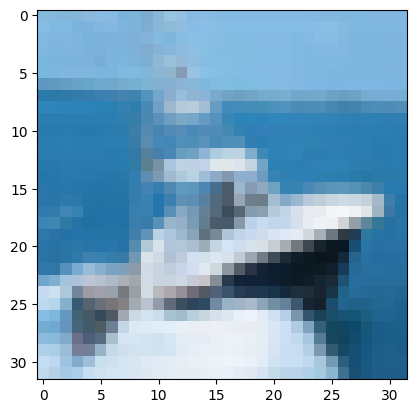

Anh la: [8]


In [ ]:
digit = x_train[8]
import matplotlib.pyplot as plt

plt.imshow(digit)
plt.show()
print("Anh la:",y_train[8])

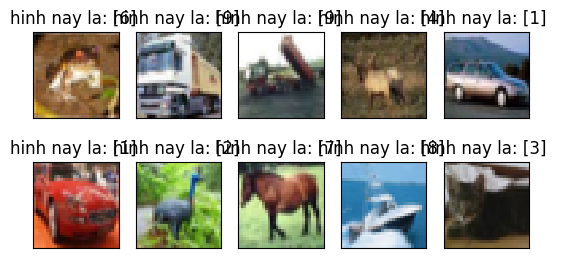

In [ ]:
for i in range(10):
  plt.subplot(3,5,i+1) #
  plt.tight_layout #
  plt.imshow(x_train[i],cmap='gray',interpolation='None') #
  plt.title('hinh nay la: {} '.format(y_train[i])) #
  plt.xticks([]) #
  plt.yticks([]) #

In [ ]:
from keras.models import Sequential # ANN su ke tiep (cac lop ke tuc nha), dung cho mang ANN
from keras.layers import Dense # full_conected (ket noi deu het voi cac no ron )


model = Sequential() # dung cho mag
model.add(Dense(10000,activation='relu',input_shape=(32*32*3,)))
# model.add(Dense(9000,activation='relu',input_shape=(10000,)))
# model.add(Dense(8000,activation='relu',input_shape=(9000,)))
# model.add(Dense(7000,activation='relu',input_shape=(8000,)))
# model.add(Dense(6000,activation='relu',input_shape=(7000,)))
# model.add(Dense(5000,activation='relu',input_shape=(6000,)))
# model.add(Dense(4000,activation='relu',input_shape=(5000,)))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10000)             30730000  
                                                                 
 dense_13 (Dense)            (None, 10)                100010    
                                                                 
Total params: 30,830,010
Trainable params: 30,830,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = x_train.reshape((50000,32*32*3)) #chuyen het du lieu 50000
x_train =x_train.astype('float32')/255 #chuyen dang 1000 ve tu 0->1

x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [ ]:
from keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (50000, 3072)
y_train: (50000, 10)
x_test: (10000, 3072)
y_test: (10000, 10)


In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=128)
test_loss,test_accuracy = model.evaluate(x_test,y_test)
print('Do mat mat: ', test_loss)
print('Do chinh xac: ',test_accuracy)

# model.Save('test1.h5')
# model10=load_model('test1.h5')
# y_pred = model10.predict(x)

Epoch 1/20
391/391 [==============================] - 282s 718ms/step - loss: 2.6780 - accuracy: 0.2684
Epoch 2/20
391/391 [==============================] - 289s 739ms/step - loss: 1.7791 - accuracy: 0.3631
Epoch 3/20
391/391 [==============================] - 285s 730ms/step - loss: 1.6846 - accuracy: 0.4000
Epoch 4/20
391/391 [==============================] - 284s 727ms/step - loss: 1.6328 - accuracy: 0.4208
Epoch 5/20
391/391 [==============================] - 282s 722ms/step - loss: 1.5891 - accuracy: 0.4373
Epoch 6/20
391/391 [==============================] - 286s 733ms/step - loss: 1.5571 - accuracy: 0.4494
Epoch 7/20
391/391 [==============================] - 283s 724ms/step - loss: 1.5312 - accuracy: 0.4589
Epoch 8/20
391/391 [==============================] - 281s 720ms/step - loss: 1.5017 - accuracy: 0.4702
Epoch 9/20
391/391 [==============================] - 282s 721ms/step - loss: 1.4747 - accuracy: 0.4779
Epoch 10/20
391/391 [==============================] - 280s 715m

KeyboardInterrupt: ignored

In [ ]:
img = plt.imread('/content/sample_data/a.jpg')
plt.imshow(img)
plt.show()

In [ ]:
from PIL import Image
from keras.utils import load_img

img = load_img('/content/sample_data/a.jpg',target_size=(32,32))
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img  =img.astype('float32')
img = img/255
np.argmax(model.predict(img),axis=-1)